In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [238]:
warnings.filterwarnings('ignore')

In [13]:
df_merged = pd.read_csv("merged_data.csv")

In [14]:
df_merged = df_merged.drop(columns="Unnamed: 0")

In [15]:
df_merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,New_PROD_NAME,pack_size,Brand,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSaltg,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese g,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken g,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly SCreamOnion g,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHnyJlpno Chili g,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246237,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle Sweet Chilli And Sour Cream g,175,Kettle,YOUNG SINGLES/COUPLES,Premium
246238,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos Splash Of Lime g,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
246239,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos Mexicana g,170,Doritos,YOUNG SINGLES/COUPLES,Premium
246240,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos Corn Chip Mexican Jalapeno g,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [18]:
# change the date type
df_merged["DATE"] = pd.to_datetime(df_merged["DATE"], errors='coerce')


In [19]:
df_merged.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
New_PROD_NAME               object
pack_size                    int64
Brand                       object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

In [21]:
# To identify control stores
# Identify the data in monthly for the following points
# what is total sales revenue for each store
# what is total # of customers for each store 
# what is the average # of transactions per customer

df_merged["month"] = df_merged["DATE"].dt.month
df_merged["year"] = df_merged["DATE"].dt.year

In [28]:
# monthly total sales revenue sum by store
monthly_total_sales_revenue = df_merged.groupby(["STORE_NBR","month"])["TOT_SALES"].sum()
monthly_total_sales_revenue_df = monthly_total_sales_revenue.reset_index()

In [29]:
monthly_total_sales_revenue_df

,STORE_NBR,month,TOT_SALES
0,1,1,149.70
1,1,2,194.70
2,1,3,185.20
3,1,4,177.40
4,1,5,207.10
...,...,...,...
3160,272,8,305.35
3161,272,9,294.50
3162,272,10,405.10
3163,272,11,355.80


In [36]:
trial_monthly_total_sales_revenue_df = monthly_total_sales_revenue_df[(monthly_total_sales_revenue_df["STORE_NBR"] == 77) 
| (monthly_total_sales_revenue_df["STORE_NBR"] == 86) | (monthly_total_sales_revenue_df["STORE_NBR"] == 88)]
trial_monthly_total_sales_revenue_df

,STORE_NBR,month,TOT_SALES
880,77,1,188.40
881,77,2,211.60
882,77,3,255.10
883,77,4,258.10
884,77,5,257.10
885,77,6,246.60
886,77,7,268.40
887,77,8,247.50
888,77,9,216.80
889,77,10,194.30


In [39]:
trial_77_monthly_total_sales_revenue_df = trial_monthly_total_sales_revenue_df[trial_monthly_total_sales_revenue_df["STORE_NBR"] == 77]
trial_86_monthly_total_sales_revenue_df = trial_monthly_total_sales_revenue_df[trial_monthly_total_sales_revenue_df["STORE_NBR"] == 86]
trial_88_monthly_total_sales_revenue_df = trial_monthly_total_sales_revenue_df[trial_monthly_total_sales_revenue_df["STORE_NBR"] == 88]

In [35]:
others_monthly_total_sales_revenue_df = monthly_total_sales_revenue_df[(monthly_total_sales_revenue_df["STORE_NBR"] != 77) & (monthly_total_sales_revenue_df["STORE_NBR"] != 86) & (monthly_total_sales_revenue_df["STORE_NBR"] != 88)]
others_monthly_total_sales_revenue_df

,STORE_NBR,month,TOT_SALES
0,1,1,149.70
1,1,2,194.70
2,1,3,185.20
3,1,4,177.40
4,1,5,207.10
...,...,...,...
3160,272,8,305.35
3161,272,9,294.50
3162,272,10,405.10
3163,272,11,355.80


In [43]:
# check how many potential stores can be checked to be control stores
len_total_other_stores = len(set(others_monthly_total_sales_revenue_df["STORE_NBR"].to_list()))
len_total_other_stores

268

In [54]:
cehck_monthly_total_sales_revenue_df = monthly_total_sales_revenue_df[(monthly_total_sales_revenue_df["STORE_NBR"] == 11)]
cehck_monthly_total_sales_revenue_df.shape[0]

2

In [68]:
# function to compare one trial store with other stores that are potentially possible to become control store.
# we use pearson correlation and check which store has the highest correlation with the specific trial store

def check_total_sales_correlation(trial_sales_df, other_sales_df, trial_num):
    sales_corr_dict = {}

    trial_array = trial_sales_df[trial_sales_df["STORE_NBR"] == int(trial_num)]["TOT_SALES"].to_list()

    total_other_stores_num_list = set(other_sales_df["STORE_NBR"].to_list())

    
    for num in total_other_stores_num_list:
        # print(num)
        potential_df = other_sales_df[other_sales_df["STORE_NBR"] == int(num)]
        # print(potential_df)
        if potential_df.shape[0] == 12:
            
            # only compare df that has 12 months records
            control_array = potential_df["TOT_SALES"].to_list()
            
            correlation_matrix = np.corrcoef(trial_array, control_array)[0,1]
            sales_corr_dict[f"{num}"] = correlation_matrix
            
    best_control_store, corr_val = check_total_sales_best_control_store(sales_corr_dict)
    print(f'best control store against trial store {trial_num}: {best_control_store}')
    print()
    print(f'best control store correlation against trial store {trial_num}: {corr_val}')
    
    return sales_corr_dict

def check_total_sales_best_control_store(sales_corr_dict):
    temp_val = 0
    store_num = 0
    for k, v in sales_corr_dict.items():
        if v > temp_val:
            temp_val = v
            store_num = k
    return store_num, temp_val

In [69]:
# check trial 77 with others

sales_corr_77_dict = check_total_sales_correlation(trial_monthly_total_sales_revenue_df, others_monthly_total_sales_revenue_df, 77)

best control store against trial store 77: 35

best control store correlation against trial store 77: 0.75934957823085


In [70]:
# check trial 86 with others

sales_corr_86_dict = check_total_sales_correlation(trial_monthly_total_sales_revenue_df, others_monthly_total_sales_revenue_df, 86)

best control store against trial store 86: 231

best control store correlation against trial store 86: 0.8627716657026007


In [71]:
# check trial 88 with others

sales_corr_88_dict = check_total_sales_correlation(trial_monthly_total_sales_revenue_df, others_monthly_total_sales_revenue_df, 88)

best control store against trial store 88: 159

best control store correlation against trial store 88: 0.8341668185702691


In [96]:
# monthly total num of customers sum by store
# number of customers coming to store. we count unique count of customers
monthly_total_customers = df_merged.groupby(["STORE_NBR","month"])["LYLTY_CARD_NBR"].nunique()
monthly_total_customers_df = monthly_total_customers.reset_index()
monthly_total_customers_df = monthly_total_customers_df.rename(columns={"LYLTY_CARD_NBR": "Total_customer"} )
monthly_total_customers_df

,STORE_NBR,month,Total_customer
0,1,1,35
1,1,2,49
2,1,3,43
3,1,4,39
4,1,5,43
...,...,...,...
3160,272,8,39
3161,272,9,31
3162,272,10,41
3163,272,11,39


In [97]:
# number of customers each month in trial stores
trial_monthly_total_customers_df = monthly_total_customers_df[(monthly_total_customers_df["STORE_NBR"] == 77) 
| (monthly_total_customers_df["STORE_NBR"] == 86) | (monthly_total_customers_df["STORE_NBR"] == 88)]
trial_monthly_total_customers_df

,STORE_NBR,month,Total_customer
880,77,1,31
881,77,2,40
882,77,3,46
883,77,4,47
884,77,5,52
885,77,6,38
886,77,7,47
887,77,8,46
888,77,9,40
889,77,10,36


In [98]:
others_monthly_total_customers_df = monthly_total_customers_df[(monthly_total_customers_df["STORE_NBR"] != 77) & (monthly_total_customers_df["STORE_NBR"] != 86) & (monthly_total_customers_df["STORE_NBR"] != 88)]
others_monthly_total_customers_df

,STORE_NBR,month,Total_customer
0,1,1,35
1,1,2,49
2,1,3,43
3,1,4,39
4,1,5,43
...,...,...,...
3160,272,8,39
3161,272,9,31
3162,272,10,41
3163,272,11,39


In [99]:
# check the total number of customers of control stores against a trial store

def check_total_customers_correlation(trial_df, other_df, trial_num):
    customer_corr_dict = {}

    trial_array = trial_df[trial_df["STORE_NBR"] == int(trial_num)]["Total_customer"].to_list()

    total_other_stores_num_list = set(other_df["STORE_NBR"].to_list())
    
    for num in total_other_stores_num_list:
        
        # print(num)
        potential_df = other_df[other_df["STORE_NBR"] == int(num)]
        
        # print(potential_df)
        if potential_df.shape[0] == 12:
            
            # only compare df that has 12 months records
            control_array = potential_df["Total_customer"].to_list()
            
            correlation_matrix = np.corrcoef(trial_array, control_array)[0,1]
            customer_corr_dict[f"{num}"] = correlation_matrix
            
    best_control_store, corr_val = check_total_customers_best_control_store(customer_corr_dict)
    print(f'best control store against trial store {trial_num}: {best_control_store}')
    print()
    print(f'best control store correlation against trial store {trial_num}: {corr_val}')
    
    return customer_corr_dict

def check_total_customers_best_control_store(customer_corr_dict):
    temp_val = 0
    store_num = 0
    for k, v in customer_corr_dict.items():
        if v > temp_val:
            temp_val = v
            store_num = k
    return store_num, temp_val

In [100]:
# check trial 77 with others using total customers

customers_corr_77_dict = check_total_customers_correlation(trial_monthly_total_customers_df, others_monthly_total_customers_df, 77)

best control store against trial store 77: 35

best control store correlation against trial store 77: 0.8007615712410507


In [101]:
# check trial 86 with others using total customers

customers_corr_86_dict = check_total_customers_correlation(trial_monthly_total_customers_df, others_monthly_total_customers_df, 86)

best control store against trial store 86: 229

best control store correlation against trial store 86: 0.7238496310139255


In [102]:
# check trial 88 with others using total customers

customers_corr_88_dict = check_total_customers_correlation(trial_monthly_total_customers_df, others_monthly_total_customers_df, 88)

best control store against trial store 88: 229

best control store correlation against trial store 88: 0.7333716085943344


We can see that the best control stores are totally different for the control stores found using "total sales per moenth" metric.
Therefore, we are going to use weighted average of 3 metrics instead to find the best control store for each trial store.

In addition, for trial 77 store, the best control store is 35 for the second time in a row. This may be the best control store for trial store 77.

In [92]:
df_merged["TXN_ID"]

0              1
1            348
2            383
3            974
4           1038
           ...  
246237    270088
246238    270154
246239    270187
246240    270188
246241    270189
Name: TXN_ID, Length: 246242, dtype: int64

In [107]:
average_transaction = df_merged.groupby(["STORE_NBR","month"])["TXN_ID"].count()
average_transaction_df = average_transaction.reset_index()
average_transaction_df = average_transaction_df.rename(columns={"TXN_ID": "total_transaction_count"})

average_transaction_merged_df = pd.merge(average_transaction_df, monthly_total_customers_df, on=["STORE_NBR", "month"], how="left")
average_transaction_merged_df["avg_transaction_per_customer"] = average_transaction_merged_df["total_transaction_count"] / average_transaction_merged_df["Total_customer"]
average_transaction_merged_df

,STORE_NBR,month,total_transaction_count,Total_customer,avg_transaction_per_customer
0,1,1,35,35,1.000000
1,1,2,51,49,1.040816
2,1,3,47,43,1.093023
3,1,4,40,39,1.025641
4,1,5,48,43,1.116279
...,...,...,...,...,...
3160,272,8,42,39,1.076923
3161,272,9,35,31,1.129032
3162,272,10,48,41,1.170732
3163,272,11,43,39,1.102564


In [124]:
def check_weighted_correlation(df_merged, trial_num):
    weighted_corr_dict = {}

    
    # total sales rev section
    sales_corr_dict = {}

    monthly_total_sales_revenue = df_merged.groupby(["STORE_NBR","month"])["TOT_SALES"].sum()
    monthly_total_sales_revenue_df = monthly_total_sales_revenue.reset_index()
    
    other_sales_df = monthly_total_sales_revenue_df[(monthly_total_sales_revenue_df["STORE_NBR"] != 77) 
    & (monthly_total_sales_revenue_df["STORE_NBR"] != 86) & (monthly_total_sales_revenue_df["STORE_NBR"] != 88)]
    
    trial_array = monthly_total_sales_revenue_df[monthly_total_sales_revenue_df["STORE_NBR"] == int(trial_num)]["TOT_SALES"].to_list()

    total_other_stores_num_list = set(other_sales_df["STORE_NBR"].to_list())
    
    for num in total_other_stores_num_list:
        # print(num)
        potential_df = other_sales_df[other_sales_df["STORE_NBR"] == int(num)]
        # print(potential_df)
        if potential_df.shape[0] == 12:
            
            # only compare df that has 12 months records
            control_array = potential_df["TOT_SALES"].to_list()
            
            correlation_matrix = np.corrcoef(trial_array, control_array)[0,1]
            weighted_correlation_matrix = correlation_matrix * (1/3)
            sales_corr_dict[f"{num}"] = weighted_correlation_matrix
            

    weighted_corr_dict = sales_corr_dict.copy()
    
    # total customer section
    customer_corr_dict = {}

    monthly_total_customers = df_merged.groupby(["STORE_NBR","month"])["LYLTY_CARD_NBR"].nunique()
    monthly_total_customers_df = monthly_total_customers.reset_index()
    monthly_total_customers_df = monthly_total_customers_df.rename(columns={"LYLTY_CARD_NBR": "Total_customer"} )

    other_df = monthly_total_customers_df[(monthly_total_customers_df["STORE_NBR"] != 77) 
    & (monthly_total_customers_df["STORE_NBR"] != 86) & (monthly_total_customers_df["STORE_NBR"] != 88)]

    trial_array = monthly_total_customers_df[monthly_total_customers_df["STORE_NBR"] == int(trial_num)]["Total_customer"].to_list()

    total_other_stores_num_list = set(other_df["STORE_NBR"].to_list())
    
    for num in total_other_stores_num_list:
        
        # print(num)
        potential_df = other_df[other_df["STORE_NBR"] == int(num)]
        
        # print(potential_df)
        if potential_df.shape[0] == 12:
            
            # only compare df that has 12 months records
            control_array = potential_df["Total_customer"].to_list()
            
            correlation_matrix = np.corrcoef(trial_array, control_array)[0,1]
            weighted_correlation_matrix = correlation_matrix * (1/3)
            customer_corr_dict[f"{num}"] = weighted_correlation_matrix 
            weighted_corr_dict[f"{num}"] = weighted_corr_dict[f"{num}"] + weighted_correlation_matrix
    
    # average number of transaction section
    avg_trans_corr_dict = {}

    average_transaction = df_merged.groupby(["STORE_NBR","month"])["TXN_ID"].count()
    average_transaction_df = average_transaction.reset_index()
    average_transaction_df = average_transaction_df.rename(columns={"TXN_ID": "total_transaction_count"})
    
    average_transaction_merged_df = pd.merge(average_transaction_df, monthly_total_customers_df, on=["STORE_NBR", "month"], how="left")
    average_transaction_merged_df["avg_transaction_per_customer"] = average_transaction_merged_df["total_transaction_count"] / average_transaction_merged_df["Total_customer"]

    other_df = average_transaction_merged_df[(average_transaction_merged_df["STORE_NBR"] != 77) 
    & (average_transaction_merged_df["STORE_NBR"] != 86) & (average_transaction_merged_df["STORE_NBR"] != 88)]

    trial_array = average_transaction_merged_df[average_transaction_merged_df["STORE_NBR"] == int(trial_num)]["avg_transaction_per_customer"].to_list()

    total_other_stores_num_list = set(other_df["STORE_NBR"].to_list())
    
    for num in total_other_stores_num_list:
        
        # print(num)
        potential_df = other_df[other_df["STORE_NBR"] == int(num)]
        
        # print(potential_df)
        if potential_df.shape[0] == 12:
            
            # only compare df that has 12 months records
            control_array = potential_df["avg_transaction_per_customer"].to_list()
            
            correlation_matrix = np.corrcoef(trial_array, control_array)[0,1]
            weighted_correlation_matrix = correlation_matrix * (1/3)
            avg_trans_corr_dict[f"{num}"] = weighted_correlation_matrix
            weighted_corr_dict[f"{num}"] = weighted_corr_dict[f"{num}"] + weighted_correlation_matrix

    best_control_store, corr_val = check_weighted_best_control_store(weighted_corr_dict)
    print(f'best control store against trial store {trial_num}: {best_control_store}')
    print()
    print(f'best control store correlation against trial store {trial_num}: {corr_val}')
    
    return weighted_corr_dict, avg_trans_corr_dict, customer_corr_dict, sales_corr_dict

def check_weighted_best_control_store(weighted_corr_dict):
    temp_val = 0
    store_num = 0
    for k, v in weighted_corr_dict.items():
        if v > temp_val:
            temp_val = v
            store_num = k
    return store_num, temp_val

In [125]:
# check trial 77 with others using weighted average of 3 metrics (total sales revenue, total # of customers, average number of transactions)

weighted_corr_dict, avg_trans_corr_dict, customer_corr_dict, sales_corr_dict = check_weighted_correlation(df_merged, 77)
print(f"avg_trans_corr_dict: {avg_trans_corr_dict['167']}")
print(f"customer_corr_dict: {customer_corr_dict['167']}")
print(f"sales_corr_dict: {sales_corr_dict['167']}")

best control store against trial store 77: 167

best control store correlation against trial store 77: 0.4681835213556424
avg_trans_corr_dict: 0.035083453579039026
customer_corr_dict: 0.23652782212153362
sales_corr_dict: 0.19657224565506975


/Users/kunisukeishigaki/.pyenv/versions/3.10.9/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/kunisukeishigaki/.pyenv/versions/3.10.9/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Avg_trans_corr shows a really low value suggesting there is something wrong with the result or calculation

In [133]:
# 35 was providing the highest corr values for trial store 77 in the previous 2 metrics
# We want to see why this store is not picked as the control store for trial store 77.
print(f"avg_trans_corr_dict: {avg_trans_corr_dict['35']}")
print(f"customer_corr_dict: {customer_corr_dict['35']}")
print(f"sales_corr_dict: {sales_corr_dict['35']}")

avg_trans_corr_dict: -0.11659460599207457
customer_corr_dict: 0.2669205237470169
sales_corr_dict: 0.25311652607695


We can see that avg trans correlation is negative providing an negative impact to the total correlation calculation.

In [127]:
total =0.25311652607695 + 0.2669205237470169 - 0.11659460599207457
total

0.40344244383189237

In [128]:
avg_trans_corr_dict

{'1': 0.009444609155618712,
 '2': -0.17719315767144342,
 '3': 0.09790601677821814,
 '4': 0.09078775433421632,
 '5': 0.05723262098644642,
 '6': 0.04175008215267671,
 '7': -0.2642339146946444,
 '8': 0.1314151937781981,
 '9': 0.06312011713936697,
 '10': -0.10854318594111254,
 '12': 0.08519415774079606,
 '13': 0.0472925156773467,
 '14': nan,
 '15': -0.06750035776437455,
 '16': 0.03678830802453124,
 '17': 0.08650547509950386,
 '18': -0.08639245187974444,
 '19': -0.08725582692770867,
 '20': 0.1896897230798679,
 '21': -0.05615924021746657,
 '22': 0.08338009790284276,
 '23': 0.05471066764753907,
 '24': -0.14964286964495221,
 '25': -0.06468210693353547,
 '26': -0.10550224538215526,
 '27': -0.0022673065577654273,
 '28': 0.03589506998428855,
 '29': 0.022814924997800988,
 '30': 0.1002329572120192,
 '32': 0.15195203401795623,
 '33': 0.003080946074102826,
 '34': 0.0030539531629530286,
 '35': -0.11659460599207457,
 '36': 0.010098534088014106,
 '37': 0.18690211839915122,
 '38': 0.14306650025893297,
 '

In [131]:
# we check one of the control store that has nan
average_transaction_merged_df[average_transaction_merged_df['STORE_NBR'] == 14]

,STORE_NBR,month,total_transaction_count,Total_customer,avg_transaction_per_customer
146,14,1,2,2,1.0
147,14,2,5,5,1.0
148,14,3,2,2,1.0
149,14,4,3,3,1.0
150,14,5,3,3,1.0
151,14,6,7,7,1.0
152,14,7,7,7,1.0
153,14,8,8,8,1.0
154,14,9,5,5,1.0
155,14,10,6,6,1.0


We can see that in average number of transactions per customer there will be some arrays that are constant, so some stores will have nan values in the calculation. Therefore, it will be impossible to calculate the correlations.
Also, the corrleaton value tends to be much lower compared with other two metrics.
As a result, we should drop this metric and only focus on using the other two metrics to identify the potential control stores for the trial stores.

In [152]:
# removed average number of transactions from the metric
# give the other two metrics equal weight of 50%
def adjusted_check_weighted_correlation(df_merged, trial_num):
    weighted_corr_dict = {}

    
    # total sales rev section
    sales_corr_dict = {}

    monthly_total_sales_revenue = df_merged.groupby(["STORE_NBR","month"])["TOT_SALES"].sum()
    monthly_total_sales_revenue_df = monthly_total_sales_revenue.reset_index()
    
    other_sales_df = monthly_total_sales_revenue_df[(monthly_total_sales_revenue_df["STORE_NBR"] != 77) 
    & (monthly_total_sales_revenue_df["STORE_NBR"] != 86) & (monthly_total_sales_revenue_df["STORE_NBR"] != 88)]
    
    trial_array = monthly_total_sales_revenue_df[monthly_total_sales_revenue_df["STORE_NBR"] == int(trial_num)]["TOT_SALES"].to_list()

    total_other_stores_num_list = set(other_sales_df["STORE_NBR"].to_list())
    
    print(f'sales_corr_total_other_stores_num_list: {total_other_stores_num_list}')

    for num in total_other_stores_num_list:
        # print(num)
        potential_df = other_sales_df[other_sales_df["STORE_NBR"] == int(num)]
        # print(potential_df)
        if potential_df.shape[0] == 12:
            print(f'In sales, sotre{num} has 12 months record')
            
            # only compare df that has 12 months records
            control_array = potential_df["TOT_SALES"].to_list()
            
            correlation_matrix = np.corrcoef(trial_array, control_array)[0,1]
            weighted_correlation_matrix = correlation_matrix * (1/2)
            sales_corr_dict[f"{num}"] = weighted_correlation_matrix
            

    weighted_corr_dict = sales_corr_dict.copy()
    
    # total customer section
    customer_corr_dict = {}

    monthly_total_customers = df_merged.groupby(["STORE_NBR","month"])["LYLTY_CARD_NBR"].nunique()
    monthly_total_customers_df = monthly_total_customers.reset_index()
    monthly_total_customers_df = monthly_total_customers_df.rename(columns={"LYLTY_CARD_NBR": "Total_customer"} )

    other_df = monthly_total_customers_df[(monthly_total_customers_df["STORE_NBR"] != 77) 
    & (monthly_total_customers_df["STORE_NBR"] != 86) & (monthly_total_customers_df["STORE_NBR"] != 88)]

    trial_array = monthly_total_customers_df[monthly_total_customers_df["STORE_NBR"] == int(trial_num)]["Total_customer"].to_list()

    total_other_stores_num_list = set(other_df["STORE_NBR"].to_list())
    
    print(f'cust_corr_total_other_stores_num_list: {total_other_stores_num_list}')
    
    for num in total_other_stores_num_list:
        
        # print(num)
        potential_df = other_df[other_df["STORE_NBR"] == int(num)]
        
        # print(potential_df)
        if potential_df.shape[0] == 12:
            print(f'In customer, sotre{num} has 12 months record')

            
            # only compare df that has 12 months records
            control_array = potential_df["Total_customer"].to_list()
            
            correlation_matrix = np.corrcoef(trial_array, control_array)[0,1]
            weighted_correlation_matrix = correlation_matrix * (1/2)
            customer_corr_dict[f"{num}"] = weighted_correlation_matrix 
            weighted_corr_dict[f"{num}"] = weighted_corr_dict[f"{num}"] + weighted_correlation_matrix

    print(f'weighted_corr_dict: {weighted_corr_dict}')

    best_control_store, corr_val = check_weighted_best_control_store(weighted_corr_dict)
    print(f'best control store against trial store {trial_num}: {best_control_store}')
    print()
    
    print(f'best control store correlation against trial store {trial_num}: {corr_val}')
    print()
    
    customer_corr_score = customer_corr_dict[best_control_store]
    print(f"customer correlation value against trial store {trial_num}: {customer_corr_score}")
    print()
    
    sales_corr_score = sales_corr_dict[best_control_store]
    print(f"sales correlation value against trial store {trial_num}: {sales_corr_score}")
    
    return weighted_corr_dict, customer_corr_dict, sales_corr_dict

def check_weighted_best_control_store(weighted_corr_dict):
    temp_val = 0
    store_num = 0
    for k, v in weighted_corr_dict.items():
        if v > temp_val:
            temp_val = v
            store_num = k
    return store_num, temp_val

In [141]:
# check trial 77 with others using weighted average of 2 metrics (total sales revenue, total # of customers)

weighted_corr_dict, customer_corr_dict, sales_corr_dict = adjusted_check_weighted_correlation(df_merged, 77)

best control store against trial store 77: 35

best control store correlation against trial store 77: 0.7800555747359503

customer correlation value against trial store 77: 0.40038078562052537

sales correlation value against trial store 77: 0.379674789115425


In [142]:
# check trial 86 with others using weighted average of 2 metrics (total sales revenue, total # of customers)

weighted_corr_dict, customer_corr_dict, sales_corr_dict = adjusted_check_weighted_correlation(df_merged, 86)

best control store against trial store 86: 229

best control store correlation against trial store 86: 0.6732402451467567

customer correlation value against trial store 86: 0.36192481550696276

sales correlation value against trial store 86: 0.3113154296397939


In [143]:
# check trial 88 with others using weighted average of 2 metrics (total sales revenue, total # of customers)

weighted_corr_dict, customer_corr_dict, sales_corr_dict = adjusted_check_weighted_correlation(df_merged, 88)

best control store against trial store 88: 229

best control store correlation against trial store 88: 0.7341772109507725

customer correlation value against trial store 88: 0.3666858042971672

sales correlation value against trial store 88: 0.3674914066536053


In [144]:
df_merged.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,pack_size,month,year
count,246242,246242.000000,2.462420e+05,2.462420e+05,246242.000000,246242.000000,246242.000000,246242.000000,246242.000000,246242.000000
mean,2018-12-30 01:19:57.855767552,135.045504,1.355260e+05,1.351258e+05,56.358793,1.901341,7.290453,175.541410,6.535022,2018.495318
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000,1.000000,2018.000000
25%,2018-09-30 00:00:00,70.000000,7.001400e+04,6.756125e+04,26.000000,2.000000,5.800000,150.000000,4.000000,2018.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351790e+05,53.000000,2.000000,7.400000,170.000000,7.000000,2018.000000
75%,2019-03-31 00:00:00,203.000000,2.030830e+05,2.026498e+05,87.000000,2.000000,8.800000,175.000000,10.000000,2019.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,15.000000,380.000000,12.000000,2019.000000
std,NaN,76.789588,8.072546e+04,7.815040e+04,33.694154,0.321899,2.405347,59.381406,3.450694,0.499979


In [145]:
# This time, we check the whole data contains date from 2018-07-01 to 2019-06-30.
# the trial period is 02/01/2019 to 04/30/2019.
# Therefore, we want to find the patterns using the period before trial period begins.
# We will limit the data to be from 2018-07-01 to 2019-01-31 to find  the control stores again.

df_merged_pre_trial = df_merged[df_merged["DATE"] < '2019-02-01']
df_merged_pre_trial

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,New_PROD_NAME,pack_size,Brand,LIFESTAGE,PREMIUM_CUSTOMER,month,year
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSaltg,175,Natural,YOUNG SINGLES/COUPLES,Premium,10,2018
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly SCreamOnion g,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,8,2018
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHnyJlpno Chili g,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,8,2018
7,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,Doritos Corn Chip Mexican Jalapeno g,150,Doritos,MIDAGE SINGLES/COUPLES,Budget,8,2018
8,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,Grain Waves Sour CreamChives G,210,Grain,MIDAGE SINGLES/COUPLES,Budget,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246236,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,Thins Chips Light Tangy g,175,Thins,YOUNG SINGLES/COUPLES,Premium,11,2018
246238,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos Splash Of Lime g,175,Tostitos,YOUNG SINGLES/COUPLES,Premium,8,2018
246239,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos Mexicana g,170,Doritos,YOUNG SINGLES/COUPLES,Premium,11,2018
246240,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos Corn Chip Mexican Jalapeno g,150,Doritos,YOUNG SINGLES/COUPLES,Premium,12,2018


In [146]:
df_merged_pre_trial.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,pack_size,month,year
count,144884,144884.000000,1.448840e+05,1.448840e+05,144884.000000,144884.000000,144884.000000,144884.000000,144884.000000,144884.000000
mean,2018-10-15 23:44:15.995140864,134.887752,1.354754e+05,1.349778e+05,56.462363,1.904434,7.302376,175.351150,8.293435,2018.142252
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000,1.000000,2018.000000
25%,2018-08-23 00:00:00,69.000000,6.923300e+04,6.731775e+04,26.000000,2.000000,5.800000,150.000000,7.000000,2018.000000
50%,2018-10-16 00:00:00,130.000000,1.302955e+05,1.348780e+05,53.000000,2.000000,7.400000,170.000000,9.000000,2018.000000
75%,2018-12-09 00:00:00,203.000000,2.030912e+05,2.026872e+05,87.000000,2.000000,8.800000,175.000000,11.000000,2018.000000
max,2019-01-31 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,15.000000,380.000000,12.000000,2019.000000
std,NaN,76.891109,8.232921e+04,7.834781e+04,33.711896,0.315906,2.395816,59.285911,3.369149,0.349309


Date are filtered out to only include dates before 2019-01-31

In [153]:
# check trial 77 with others using weighted average of 2 metrics (total sales revenue, total # of customers)

weighted_corr_dict, customer_corr_dict, sales_corr_dict = adjusted_check_weighted_correlation(df_merged_pre_trial, 77)

sales_corr_total_other_stores_num_list: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218

KeyError: 0

We got the error because we exlcude the dates after trial periods, but we only consider stores that have records for 12 months which cannot happen in this case.

In [155]:
filtered_monthly_total_sales_revenue = df_merged_pre_trial.groupby(["STORE_NBR","month"])["TOT_SALES"].sum()
filtered_monthly_total_sales_revenue_df = filtered_monthly_total_sales_revenue.reset_index()
filtered_monthly_total_sales_revenue_df_1 = filtered_monthly_total_sales_revenue_df[filtered_monthly_total_sales_revenue_df["STORE_NBR"] == 1]
filtered_monthly_total_sales_revenue_df_1

,STORE_NBR,month,TOT_SALES
0,1,1,149.7
1,1,7,188.9
2,1,8,168.4
3,1,9,268.1
4,1,10,175.4
5,1,11,184.8
6,1,12,160.6


We need to include the period after the trial ends for more information.

In [168]:
df_merged_pre_trial_after_trial = df_merged[(df_merged["DATE"] < '2019-02-01') |(df_merged["DATE"] > '2019-05-01')]
df_merged_pre_trial_after_trial

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,New_PROD_NAME,pack_size,Brand,LIFESTAGE,PREMIUM_CUSTOMER,month,year
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSaltg,175,Natural,YOUNG SINGLES/COUPLES,Premium,10,2018
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese g,175,CCs,MIDAGE SINGLES/COUPLES,Budget,5,2019
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken g,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,5,2019
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly SCreamOnion g,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,8,2018
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHnyJlpno Chili g,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246236,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,Thins Chips Light Tangy g,175,Thins,YOUNG SINGLES/COUPLES,Premium,11,2018
246238,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos Splash Of Lime g,175,Tostitos,YOUNG SINGLES/COUPLES,Premium,8,2018
246239,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos Mexicana g,170,Doritos,YOUNG SINGLES/COUPLES,Premium,11,2018
246240,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos Corn Chip Mexican Jalapeno g,150,Doritos,YOUNG SINGLES/COUPLES,Premium,12,2018


In [169]:
filtered_monthly_total_sales_revenue = df_merged_pre_trial_after_trial.groupby(["STORE_NBR","month"])["TOT_SALES"].sum()
filtered_monthly_total_sales_revenue_df = filtered_monthly_total_sales_revenue.reset_index()
filtered_monthly_total_sales_revenue_df_1 = filtered_monthly_total_sales_revenue_df[filtered_monthly_total_sales_revenue_df["STORE_NBR"] == 10]
filtered_monthly_total_sales_revenue_df_1

,STORE_NBR,month,TOT_SALES
81,10,1,791.20
82,10,5,690.55
83,10,6,665.80
84,10,7,829.20
85,10,8,841.25
86,10,9,888.00
87,10,10,812.00
88,10,11,787.80
89,10,12,894.00


We will only have 9 months after excluding the trial period. Therefore, we will modify the function to include only 9 months as a requirement.

In [173]:
# removed average number of transactions from the metric
# give the other two metrics equal weight of 50%
# only include the 9 months of data. We exclude trial period from the df.
def adjusted_check_weighted_correlation(df_merged, trial_num):
    weighted_corr_dict = {}

    
    # total sales rev section
    sales_corr_dict = {}

    monthly_total_sales_revenue = df_merged.groupby(["STORE_NBR","month"])["TOT_SALES"].sum()
    monthly_total_sales_revenue_df = monthly_total_sales_revenue.reset_index()
    
    other_sales_df = monthly_total_sales_revenue_df[(monthly_total_sales_revenue_df["STORE_NBR"] != 77) 
    & (monthly_total_sales_revenue_df["STORE_NBR"] != 86) & (monthly_total_sales_revenue_df["STORE_NBR"] != 88)]
    
    trial_array = monthly_total_sales_revenue_df[monthly_total_sales_revenue_df["STORE_NBR"] == int(trial_num)]["TOT_SALES"].to_list()

    total_other_stores_num_list = set(other_sales_df["STORE_NBR"].to_list())
    
    # print(f'sales_corr_total_other_stores_num_list: {total_other_stores_num_list}')

    for num in total_other_stores_num_list:
        # print(num)
        potential_df = other_sales_df[other_sales_df["STORE_NBR"] == int(num)]
        # print(potential_df)
        if potential_df.shape[0] == 9:
            # print(f'In sales, sotre{num} has 9 months record')
            
            # only compare df that has 12 months records
            control_array = potential_df["TOT_SALES"].to_list()
            
            correlation_matrix = np.corrcoef(trial_array, control_array)[0,1]
            weighted_correlation_matrix = correlation_matrix * (1/2)
            sales_corr_dict[f"{num}"] = weighted_correlation_matrix
            

    weighted_corr_dict = sales_corr_dict.copy()
    
    # total customer section
    customer_corr_dict = {}

    monthly_total_customers = df_merged.groupby(["STORE_NBR","month"])["LYLTY_CARD_NBR"].nunique()
    monthly_total_customers_df = monthly_total_customers.reset_index()
    monthly_total_customers_df = monthly_total_customers_df.rename(columns={"LYLTY_CARD_NBR": "Total_customer"} )

    other_df = monthly_total_customers_df[(monthly_total_customers_df["STORE_NBR"] != 77) 
    & (monthly_total_customers_df["STORE_NBR"] != 86) & (monthly_total_customers_df["STORE_NBR"] != 88)]

    trial_array = monthly_total_customers_df[monthly_total_customers_df["STORE_NBR"] == int(trial_num)]["Total_customer"].to_list()

    total_other_stores_num_list = set(other_df["STORE_NBR"].to_list())
    
    # print(f'cust_corr_total_other_stores_num_list: {total_other_stores_num_list}')
    
    for num in total_other_stores_num_list:
        
        # print(num)
        potential_df = other_df[other_df["STORE_NBR"] == int(num)]
        
        # print(potential_df)
        if potential_df.shape[0] == 9:
            # print(f'In customer, sotre{num} has 9 months record')
            
            # only compare df that has 12 months records
            control_array = potential_df["Total_customer"].to_list()
            
            correlation_matrix = np.corrcoef(trial_array, control_array)[0,1]
            weighted_correlation_matrix = correlation_matrix * (1/2)
            customer_corr_dict[f"{num}"] = weighted_correlation_matrix 
            weighted_corr_dict[f"{num}"] = weighted_corr_dict[f"{num}"] + weighted_correlation_matrix

    # print(f'weighted_corr_dict: {weighted_corr_dict}')

    best_control_store, corr_val = check_weighted_best_control_store(weighted_corr_dict)
    print(f'best control store against trial store {trial_num}: {best_control_store}')
    print()
    
    print(f'best control store correlation against trial store {trial_num}: {corr_val}')
    print()
    
    customer_corr_score = customer_corr_dict[best_control_store]
    print(f"customer correlation value against trial store {trial_num}: {customer_corr_score}")
    print()
    
    sales_corr_score = sales_corr_dict[best_control_store]
    print(f"sales correlation value against trial store {trial_num}: {sales_corr_score}")
    
    return weighted_corr_dict, customer_corr_dict, sales_corr_dict

def check_weighted_best_control_store(weighted_corr_dict):
    temp_val = 0
    store_num = 0
    for k, v in weighted_corr_dict.items():
        if v > temp_val:
            temp_val = v
            store_num = k
    return store_num, temp_val

In [174]:
# check trial 77 with others using weighted average of 2 metrics (total sales revenue, total # of customers)

weighted_corr_dict, customer_corr_dict, sales_corr_dict = adjusted_check_weighted_correlation(df_merged_pre_trial_after_trial, 77)

best control store against trial store 77: 233

best control store correlation against trial store 77: 0.9279215698984224

customer correlation value against trial store 77: 0.4733588364716109

sales correlation value against trial store 77: 0.4545627334268116


In [175]:
# check trial 86 with others using weighted average of 2 metrics (total sales revenue, total # of customers)

weighted_corr_dict, customer_corr_dict, sales_corr_dict = adjusted_check_weighted_correlation(df_merged_pre_trial_after_trial, 86)

best control store against trial store 86: 155

best control store correlation against trial store 86: 0.8429230093784512

customer correlation value against trial store 86: 0.39494262825522747

sales correlation value against trial store 86: 0.4479803811232238


In [176]:
# check trial 88 with others using weighted average of 2 metrics (total sales revenue, total # of customers)

weighted_corr_dict, customer_corr_dict, sales_corr_dict = adjusted_check_weighted_correlation(df_merged_pre_trial_after_trial, 88)

best control store against trial store 88: 106

best control store correlation against trial store 88: 0.6784428345062345

customer correlation value against trial store 88: 0.3742767537629581

sales correlation value against trial store 88: 0.3041660807432765


We found the best control stores for each trial store.

In [179]:
# Do the analysis for trial vs control store during trial periods.
# Compare the total sales trend for trial vs control to see if trial store has a better or worse sales
# Compare the total number of customers for trial vs control to see 
# if there are more customer or less customers coming in trial vs control

df_merged_trial = df_merged[(df_merged["DATE"] > "2019-01-31") & (df_merged["DATE"] < "2019-05-01")]
df_merged_trial.describe()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,pack_size,month,year
count,60409,60409.000000,60409.000000,60409.000000,60409.000000,60409.000000,60409.000000,60409.000000,60409.000000,60409.0
mean,2019-03-16 23:27:07.684616448,135.416411,135601.957092,135493.938850,56.353308,1.921104,7.376508,175.877286,3.021139,2019.0
min,2019-02-01 00:00:00,1.000000,1003.000000,3.000000,1.000000,1.000000,1.700000,70.000000,2.000000,2019.0
25%,2019-02-23 00:00:00,70.000000,70122.000000,68179.000000,26.000000,2.000000,5.800000,150.000000,2.000000,2019.0
50%,2019-03-17 00:00:00,131.000000,132313.000000,135922.000000,53.000000,2.000000,7.400000,170.000000,3.000000,2019.0
75%,2019-04-08 00:00:00,203.000000,203068.000000,202587.000000,87.000000,2.000000,8.800000,175.000000,4.000000,2019.0
max,2019-04-30 00:00:00,272.000000,272392.000000,270209.000000,114.000000,3.000000,13.000000,380.000000,4.000000,2019.0
std,NaN,76.644575,76639.693072,77860.073509,33.729736,0.269639,2.355166,59.648192,0.806152,0.0


In [183]:
df_merged_trial

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,New_PROD_NAME,pack_size,Brand,LIFESTAGE,PREMIUM_CUSTOMER,month,year
181,2019-02-27,1,1081,93,96,WW Original Stacked Chips 160g,2,3.8,WW Original Stacked Chips g,160,WW,MIDAGE SINGLES/COUPLES,Budget,2,2019
182,2019-03-19,1,1081,94,8,Smiths Crinkle Cut Chips Original 170g,1,2.9,Smiths Crinkle Cut Chips Original g,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,3,2019
185,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,CCs Original g,175,CCs,MIDAGE SINGLES/COUPLES,Budget,3,2019
187,2019-03-13,1,1348,391,48,Red Rock Deli Sp Salt & Truffle 150G,1,2.7,Red Rock Deli Sp Salt Truffle G,150,Red,MIDAGE SINGLES/COUPLES,Budget,3,2019
188,2019-04-06,1,1395,453,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8,Smiths Crinkle Cut Chips Chicken g,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246229,2019-03-17,272,272156,269855,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle g Swt Pot Sea Salt,135,Kettle,YOUNG SINGLES/COUPLES,Premium,3,2019
246230,2019-03-13,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,Kettle Tortilla ChpsBtrootRicotta g,150,Kettle,YOUNG SINGLES/COUPLES,Premium,3,2019
246232,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,Cobs Popd Sea Salt Chips g,110,Cobs,YOUNG SINGLES/COUPLES,Premium,3,2019
246235,2019-03-16,272,272236,269976,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6,Infuzions SourCreamHerbs Veg Strws g,110,Infuzions,YOUNG SINGLES/COUPLES,Premium,3,2019


In [191]:
monthly_sales_revenue_trial_period = df_merged_trial.groupby(["STORE_NBR", "month"])["TOT_SALES"].sum()
monthly_sales_revenue_trial_period = monthly_sales_revenue_trial_period.reset_index()
monthly_sales_revenue_trial_period1 = monthly_sales_revenue_trial_period.copy()
monthly_sales_revenue_trial_period1['source'] = 'DF1'
monthly_sales_revenue_trial_period2 = monthly_sales_revenue_trial_period.copy()
monthly_sales_revenue_trial_period2['source'] = 'DF2'
combined_dfs = pd.concat([monthly_sales_revenue_trial_period1, monthly_sales_revenue_trial_period2])
combined_dfs

,STORE_NBR,month,TOT_SALES,source
0,1,2,194.7,DF1
1,1,3,185.2,DF1
2,1,4,177.4,DF1
3,2,2,136.8,DF1
4,2,3,174.0,DF1
...,...,...,...,...
787,271,3,699.6,DF2
788,271,4,700.8,DF2
789,272,2,385.3,DF2
790,272,3,421.9,DF2


In [214]:
# make a function to separate the data and return the trial vs control store data in pre-trial period to understand 
# whether the control store needs to be scaled to match the trial store

def output_month_sales_pretrial_trial_control(df_merged, trial_num, control_num):
    # pre-trial period
    df_merged_pre_trial = df_merged[df_merged["DATE"] < "2019-02-01"]
    
    monthly_sales_revenue_pre_trial_period = df_merged_pre_trial.groupby(["STORE_NBR", "month"])["TOT_SALES"].sum()
    monthly_sales_revenue_pre_trial_period = monthly_sales_revenue_pre_trial_period.reset_index()
    
    trial_month_sales = monthly_sales_revenue_pre_trial_period[monthly_sales_revenue_pre_trial_period["STORE_NBR"] == int(trial_num)]
    control_month_sales = monthly_sales_revenue_pre_trial_period[monthly_sales_revenue_pre_trial_period["STORE_NBR"] == int(control_num)]
    trial_month_sales['source'] = 'Trial store'
    control_month_sales['source'] = 'Control store'
    print(trial_month_sales)
    print()
    print(control_month_sales)

    # combine both dfs into 1 df
    combined_df = pd.concat([trial_month_sales, control_month_sales])

    # sns lineplot
    sns.lineplot(data=combined_df, x='month', y='TOT_SALES', hue='source', marker='o')

    # Customize the plot
    plt.title(f"Monthly Sales Trend - Pre trial Period - Trial Store {trial_num} vs Control Store {control_num}")
    plt.xlabel("Month")
    plt.ylabel("Sales")
    plt.legend(title="Source")
    plt.show()

     STORE_NBR  month  TOT_SALES       source
515         77      1      188.4  Trial store
516         77      7      268.4  Trial store
517         77      8      247.5  Trial store
518         77      9      216.8  Trial store
519         77     10      194.3  Trial store
520         77     11      224.9  Trial store
521         77     12      255.2  Trial store

      STORE_NBR  month  TOT_SALES         source
1572        233      1      150.5  Control store
1573        233      7      271.2  Control store
1574        233      8      237.7  Control store
1575        233      9      220.9  Control store
1576        233     10      159.3  Control store
1577        233     11      206.5  Control store
1578        233     12      265.4  Control store


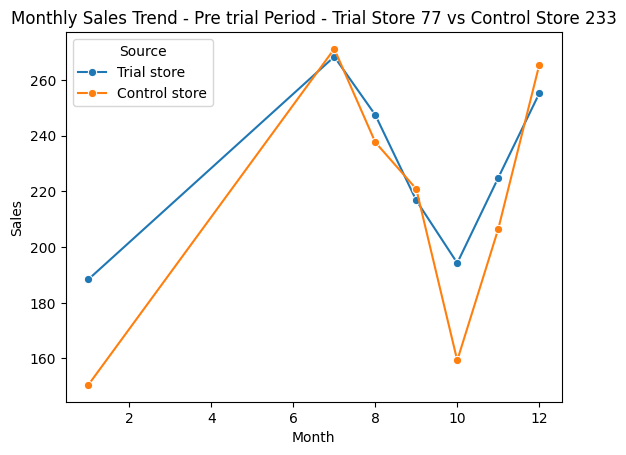

In [239]:
# To compare the trial store 77 vs control 233 to see if there is need for scaling of control store
output_month_sales_pretrial_trial_control(df_merged, 77, 233)

we can see that there is some need to introduce the scaling factor to control store as the sales of control store is generally lower compared to the sales on trial store.

In [286]:
# Identify scaling factor in sales for trial store vs control store
def output_scaling_factor(df_merged, trial_num, control_num):
    
    trial_store_baseline = df_merged[((df_merged['DATE'] < '2019-02-01') | (df_merged['DATE'] > '2019-04-30')) 
    & (df_merged['STORE_NBR'] == int(trial_num))]["TOT_SALES"].sum()
    print(f'trial_store_baseline: {trial_store_baseline}')
    
    control_store_baseline = df_merged[((df_merged['DATE'] < '2019-02-01') | (df_merged['DATE'] > '2019-04-30')) 
    & (df_merged['STORE_NBR'] == int(control_num))]["TOT_SALES"].sum()
    print(f'control_store_baseline: {control_store_baseline}')

    scaling_factor = trial_store_baseline / control_store_baseline

    print(f'scaling factor for control store: {scaling_factor}')
    print()

    return scaling_factor

In [287]:
# trial 77 and control 233
# to determine how much scaling of sales is needed to apply to control store
output_scaling_factor(df_merged, 77, 233)

trial_store_baseline: 2099.2
control_store_baseline: 1997.6000000000001
scaling factor for control store: 1.0508610332398878



1.0508610332398878

In [288]:
# trial 86 and control 155
# to determine how much scaling of sales is needed to apply to control store
output_scaling_factor(df_merged, 86, 155)

trial_store_baseline: 7355.25
control_store_baseline: 7559.35
scaling factor for control store: 0.9730003241019399



0.9730003241019399

In [289]:
# trial 88 and control 106
# to determine how much scaling of sales is needed to apply to control store
output_scaling_factor(df_merged, 88, 106)

trial_store_baseline: 11211.95
control_store_baseline: 7553.7
scaling factor for control store: 1.4842990852165165



1.4842990852165165

In [290]:
def output_month_sales_trial_control_after_scaling(df_merged, trial_num, control_num):
    # scaling factor for control store obtained from non-trial period
    scaling_factor = output_scaling_factor(df_merged, trial_num, control_num)

    # df_merged_trial
    df_merged_trial  = df_merged[ (df_merged['DATE'] > '2019-01-31') & (df_merged['DATE'] < '2019-05-01') ]
    
    monthly_sales_revenue_trial_period = df_merged_trial.groupby(["STORE_NBR", "month"])["TOT_SALES"].sum()
    monthly_sales_revenue_trial_period = monthly_sales_revenue_trial_period.reset_index()
    
    trial_month_sales = monthly_sales_revenue_trial_period[monthly_sales_revenue_trial_period["STORE_NBR"] == int(trial_num)]
    control_month_sales = monthly_sales_revenue_trial_period[monthly_sales_revenue_trial_period["STORE_NBR"] == int(control_num)]

    # scaling control sales in trial period
    control_month_sales['TOT_SALES'] = control_month_sales['TOT_SALES'] * scaling_factor
    
    trial_month_sales['source'] = 'Trial store'
    control_month_sales['source'] = 'Control store'
    print(trial_month_sales)
    print()
    print(control_month_sales)

    sum_trial_sales = trial_month_sales['TOT_SALES'].sum()
    sum_control_sales = control_month_sales['TOT_SALES'].sum()

    percentage_difference = ((sum_trial_sales - sum_control_sales) / (sum_control_sales)) * 100
    print()
    print(f'Percentage difference - trial vs control in trial period: {percentage_difference:.2f}%')

    # combine both dfs into 1 df
    combined_df = pd.concat([trial_month_sales, control_month_sales])

    # sns lineplot
    sns.lineplot(data=combined_df, x='month', y='TOT_SALES', hue='source', marker='o')

    # Customize the plot
    plt.title(f"Monthly Sales Trend in Trial Period - Trial Store {trial_num} vs Scaled Control Store {control_num}")
    plt.xlabel("Month")
    plt.ylabel("Sales")
    plt.legend(title="Source")
    plt.show()

trial_store_baseline: 2099.2
control_store_baseline: 1997.6000000000001
scaling factor for control store: 1.0508610332398878

     STORE_NBR  month  TOT_SALES       source
219         77      2      211.6  Trial store
220         77      3      255.1  Trial store
221         77      4      258.1  Trial store

     STORE_NBR  month   TOT_SALES         source
674        233      2  231.925030  Control store
675        233      3  189.785503  Control store
676        233      4  151.534161  Control store

Percentage difference - trial vs control in trial period: 26.44%


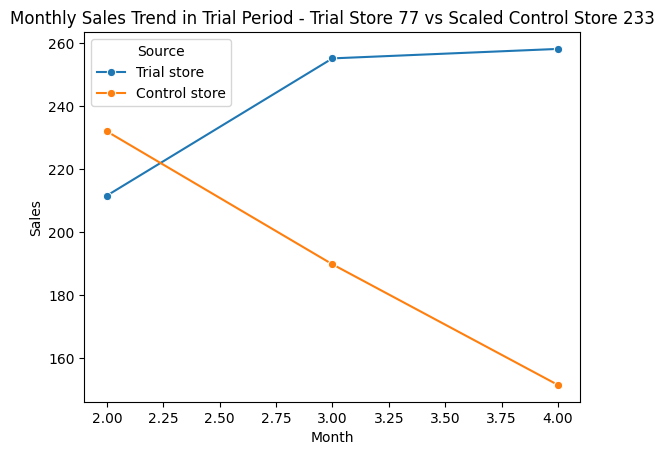

In [291]:
# monthly sales trend trial 77 vs control 233
output_month_sales_trial_control_after_scaling(df_merged, 77, 233)

trial_store_baseline: 7355.25
control_store_baseline: 7559.35
scaling factor for control store: 0.9730003241019399

     STORE_NBR  month  TOT_SALES       source
243         86      2      872.8  Trial store
244         86      3      945.4  Trial store
245         86      4      804.0  Trial store

     STORE_NBR  month   TOT_SALES         source
448        155      2  827.828676  Control store
449        155      3  746.291249  Control store
450        155      4  778.789459  Control store

Percentage difference - trial vs control in trial period: 11.45%


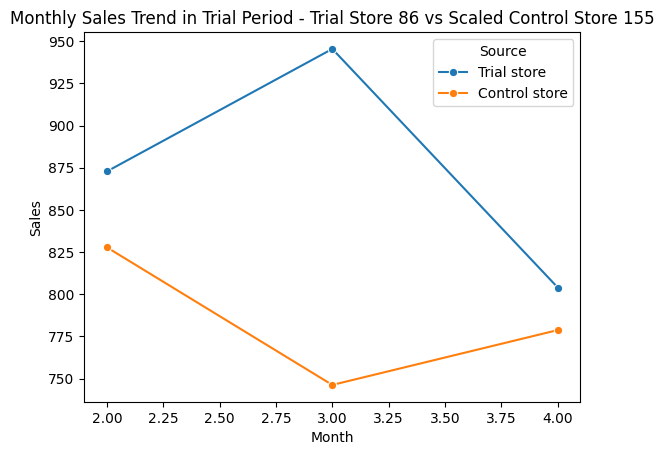

In [292]:
# monthly sales trend trial 86 vs control 155
output_month_sales_trial_control_after_scaling(df_merged, 86, 155)

trial_store_baseline: 11211.95
control_store_baseline: 7553.7
scaling factor for control store: 1.4842990852165165

     STORE_NBR  month  TOT_SALES       source
249         88      2     1339.6  Trial store
250         88      3     1467.0  Trial store
251         88      4     1317.0  Trial store

     STORE_NBR  month    TOT_SALES         source
301        106      2  1118.864650  Control store
302        106      3  1302.620877  Control store
303        106      4  1077.897996  Control store

Percentage difference - trial vs control in trial period: 17.84%


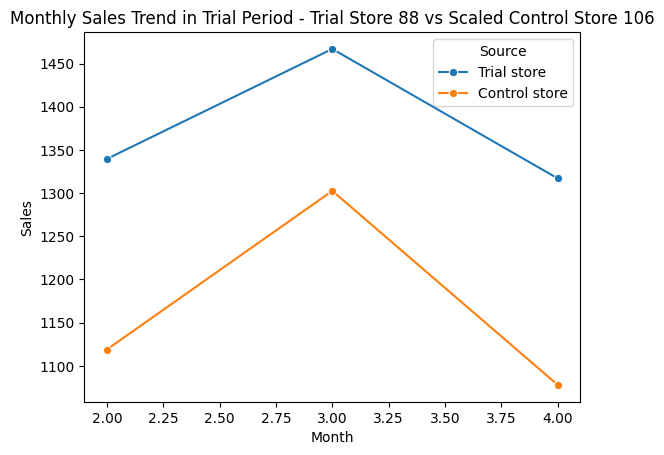

In [293]:
# monthly sales trend trial 88 vs control 106
output_month_sales_trial_control_after_scaling(df_merged, 88, 106)

We can see that except the sales in trial store 77 in Febuaray the rest of periods' for trial stores all outperform control stores even when the control stores' sales have been adjusted to match the level of trial stores. Therefore, we can see that the new implementation in trials store has a good impact on sales.

Trial store 77 has a uplift of 26.44% in sales compared to control sotre

Trial store 86 has a uplift of 11.45% in sales compared to control sotre

Trial store 88 has a uplift of 17.84% in sales compared to control sotre

In [310]:
average_percentage_uplift_sales = (26.44 + 11.45 + 17.84) * (1/3)
print(f'{average_percentage_uplift_sales:.2f}')

18.58


In [296]:
# Identify scaling factor in customers for trial store vs control store
def output_scaling_factor_customers(df_merged, trial_num, control_num):
    
    trial_store_baseline = df_merged[((df_merged['DATE'] < '2019-02-01') | (df_merged['DATE'] > '2019-04-30')) 
    & (df_merged['STORE_NBR'] == int(trial_num))]["LYLTY_CARD_NBR"].count()
    print(f'trial_store_baseline: {trial_store_baseline}')
    
    control_store_baseline = df_merged[((df_merged['DATE'] < '2019-02-01') | (df_merged['DATE'] > '2019-04-30')) 
    & (df_merged['STORE_NBR'] == int(control_num))]["LYLTY_CARD_NBR"].count()
    print(f'control_store_baseline: {control_store_baseline}')

    scaling_factor = trial_store_baseline / control_store_baseline

    print(f'scaling factor for control store: {scaling_factor}')

    print()
    return scaling_factor

In [297]:
# trial 77 and control 233
# to determine how much scaling of customers is needed to apply to control store
output_scaling_factor_customers(df_merged, 77, 233)

trial_store_baseline: 390
control_store_baseline: 373
scaling factor for control store: 1.0455764075067024



1.0455764075067024

In [298]:
# trial 86 and control 155
# to determine how much scaling of customers is needed to apply to control store
output_scaling_factor_customers(df_merged, 86, 155)

trial_store_baseline: 1058
control_store_baseline: 1082
scaling factor for control store: 0.977818853974122



0.977818853974122

In [299]:
# trial 88 and control 106
# to determine how much scaling of customers is needed to apply to control store
output_scaling_factor_customers(df_merged, 88, 106)

trial_store_baseline: 1310
control_store_baseline: 1101
scaling factor for control store: 1.189827429609446



1.189827429609446

In [300]:
def output_month_ssutomers_trial_control_after_scaling(df_merged, trial_num, control_num):
    # scaling factor for control store obtained from non-trial period
    scaling_factor = output_scaling_factor_customers(df_merged, trial_num, control_num)

    # df_merged_trial
    df_merged_trial  = df_merged[ (df_merged['DATE'] > '2019-01-31') & (df_merged['DATE'] < '2019-05-01') ]
    
    monthly_customers_trial_period = df_merged_trial.groupby(["STORE_NBR", "month"])["LYLTY_CARD_NBR"].count()
    monthly_customers_trial_period = monthly_customers_trial_period.reset_index()
    monthly_customers_trial_period = monthly_customers_trial_period.rename(columns={"LYLTY_CARD_NBR": "total_customers"})
    
    trial_month_customers = monthly_customers_trial_period[monthly_customers_trial_period["STORE_NBR"] == int(trial_num)]
    control_month_customers = monthly_customers_trial_period[monthly_customers_trial_period["STORE_NBR"] == int(control_num)]

    # scaling control customers in trial period
    control_month_customers['total_customers'] = control_month_customers['total_customers'] * scaling_factor
    
    trial_month_customers['source'] = 'Trial store'
    control_month_customers['source'] = 'Control store'
    print(trial_month_customers)
    print()
    print(control_month_customers)

    sum_trial_month_customers = trial_month_customers['total_customers'].sum()
    sum_control_month_customers = control_month_customers['total_customers'].sum()

    percentage_difference = ((sum_trial_month_customers - sum_control_month_customers) / (sum_control_month_customers)) * 100
    print()
    print(f'Percentage difference - trial vs control in trial period: {percentage_difference:.2f}%')

    # combine both dfs into 1 df
    combined_df = pd.concat([trial_month_customers, control_month_customers])

    # sns lineplot
    sns.lineplot(data=combined_df, x='month', y='total_customers', hue='source', marker='o')

    # Customize the plot
    plt.title(f"Monthly Customer Trend in Trial Period - Trial Store {trial_num} vs Scaled Control Store {control_num}")
    plt.xlabel("Month")
    plt.ylabel("The number of customers")
    plt.legend(title="Source")
    plt.show()

trial_store_baseline: 390
control_store_baseline: 373
scaling factor for control store: 1.0455764075067024

     STORE_NBR  month  total_customers       source
219         77      2               40  Trial store
220         77      3               51  Trial store
221         77      4               47  Trial store

     STORE_NBR  month  total_customers         source
674        233      2        44.959786  Control store
675        233      3        37.640751  Control store
676        233      4        30.321716  Control store

Percentage difference - trial vs control in trial period: 22.21%


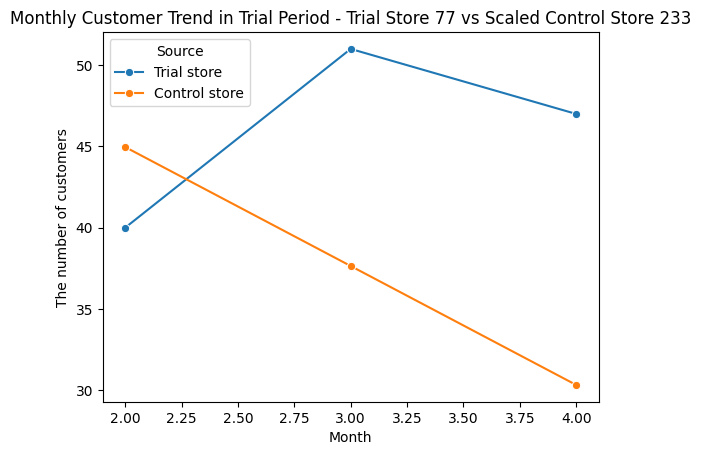

In [301]:
# monthly customers trend trial 77 vs control 233
output_month_ssutomers_trial_control_after_scaling(df_merged, 77, 233)


trial_store_baseline: 1058
control_store_baseline: 1082
scaling factor for control store: 0.977818853974122

     STORE_NBR  month  total_customers       source
243         86      2              131  Trial store
244         86      3              128  Trial store
245         86      4              120  Trial store

     STORE_NBR  month  total_customers         source
448        155      2       116.360444  Control store
449        155      3       109.515712  Control store
450        155      4       111.471349  Control store

Percentage difference - trial vs control in trial period: 12.35%


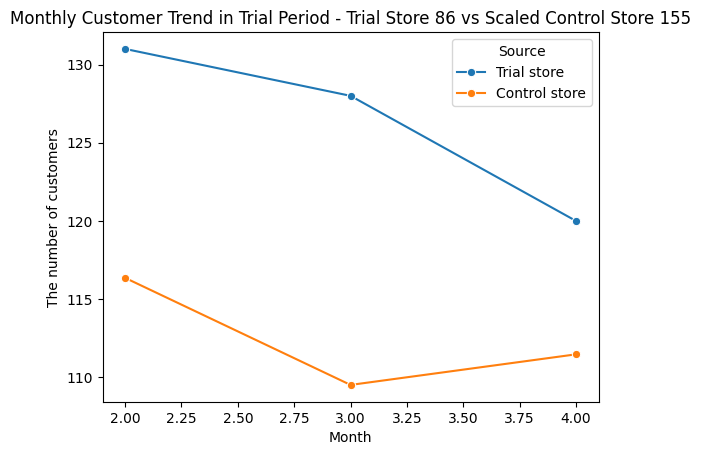

In [302]:
# monthly customers trend trial 86 vs control 155
output_month_ssutomers_trial_control_after_scaling(df_merged, 86, 155)


trial_store_baseline: 1310
control_store_baseline: 1101
scaling factor for control store: 1.189827429609446

     STORE_NBR  month  total_customers       source
249         88      2              151  Trial store
250         88      3              169  Trial store
251         88      4              150  Trial store

     STORE_NBR  month  total_customers         source
301        106      2       124.931880  Control store
302        106      3       149.918256  Control store
303        106      4       118.982743  Control store

Percentage difference - trial vs control in trial period: 19.34%


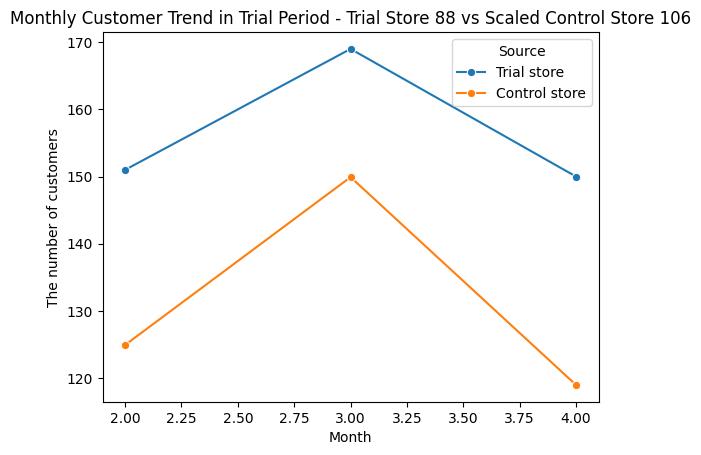

In [303]:
# monthly customers trend trial 88 vs control 106
output_month_ssutomers_trial_control_after_scaling(df_merged, 88, 106)


We can see that except the number of customers in trial store 77 in Febuaray the rest of periods' for trial stores all outperform control stores even when the control stores' number of customers have been adjusted to match the level of trial stores. Therefore, we can see that the new implementation in trials store has a good impact on the number of customers comging to the stores.

Trial store 77 has a uplift of 22.21% in sales compared to control sotre

Trial store 86 has a uplift of 12.35% in sales compared to control sotre

Trial store 88 has a uplift of 19.34% in sales compared to control sotre

In [311]:
average_percentage_uplift_customers = (22.21 + 12.35 + 19.34) * (1/3)
print(f'{average_percentage_uplift_customers:.2f}')

17.97


# Findings: #
Based on the analysis, we found that the implementation on trial stores has a good impact on the total sales and the number of customers coming to the stores by comparing the trial stores and cotrol stores. WIth the new implementation, we can see the there is an uplift in 18.58% in sales and 17.97% in the number of customers.

In [ ]:
# To test the null hypothesis
# ho: the trial period is the same as the pre-trail period.